In [49]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image

In [50]:
def read_file(filename):
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()
    return img

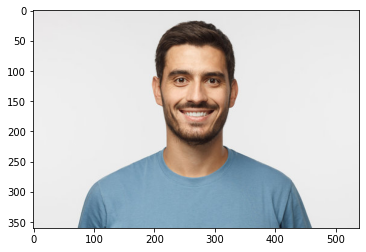

In [68]:
image = "test.jpg"
img = read_file(image)

org_img = np.copy(img)

# Create Edge Mask

In [69]:
def edge_mask(img, line_size, blur_value):
    """
    input: input image
    output: edges of image
    """
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray_blur = cv2.medianBlur(gray, blur_value)

    edges = cv2.adaptiveThreshold(gray_blur, 255, 
        cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 
        line_size, blur_value)
    return edges

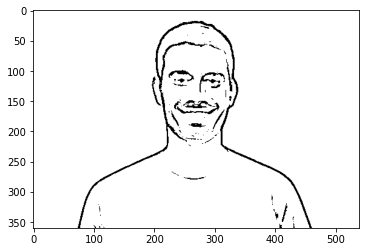

In [70]:
line_size, blur_value = 7, 7
edges = edge_mask(img, line_size, blur_value)
plt.imshow(edges, cmap="gray")

## Reduce the color palette

In [71]:
def color_quantization(img, k):
    # transform the image
    data = np.float32(img).reshape((-1, 3))

    # determine criteria
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)

    # implementing k-means
    ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)

    result = center[label.flatten()]
    result = result.reshape(img.shape)

    return result

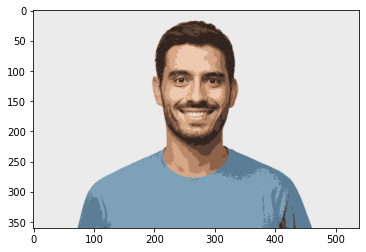

In [72]:
img_quantiz = color_quantization(img, k=9)
plt.imshow(img_quantiz)
plt.show()

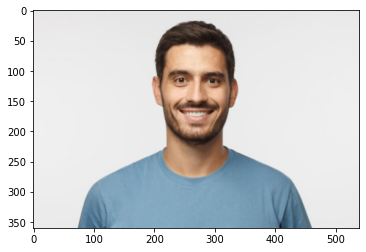

In [73]:
# reduce the noise

blurred = cv2.bilateralFilter(img, d=3, sigmaColor=200, sigmaSpace=200)

plt.imshow(blurred)
plt.show()

# Combine Edge Mask with the quantiz img

In [74]:
def cartoon():
    c = cv2.bitwise_and(blurred, blurred, mask=edges)
    plt.imshow(c)
    plt.title("Cartoonified Image")
    plt.show()

    plt.imshow(org_img)
    plt.title("Original Image")
    plt.show()

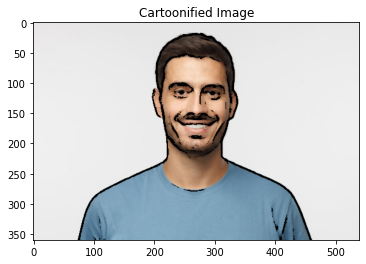

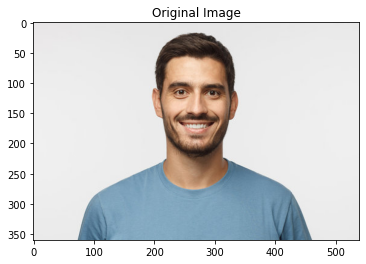

In [75]:
cartoon()